<div dir="rtl">
    الف) ابتدا تصویر زیر را که در پوشه  imagesآمده است را بخوانید
<div>

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Image')

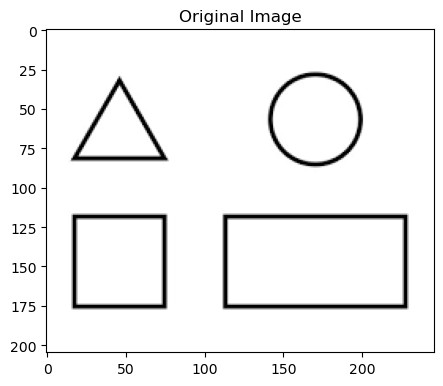

In [2]:
# Read the image
original_img = cv2.imread('images/Q7.png', cv2.IMREAD_GRAYSCALE)
assert original_img is not None, "file could not be read, check with os.path.exists()"

plt.figure(figsize=(5,5))
# show original image
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')

<div dir="rtl">
    ب) در مورد تابع  findContoursتحقیق کنید و بگویید که چه کاری انجام میدهد. سپس با استفاده از آن مرز اشکال
را پیدا کنید و رسم کنید. اگر به پیشپردازشی نیز نیاز است، آن را انجام داده و علت کار خود را بگویید
<div>

In [3]:
# original_img.max()
# original_img.min()
original_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Number of Contours found = 9


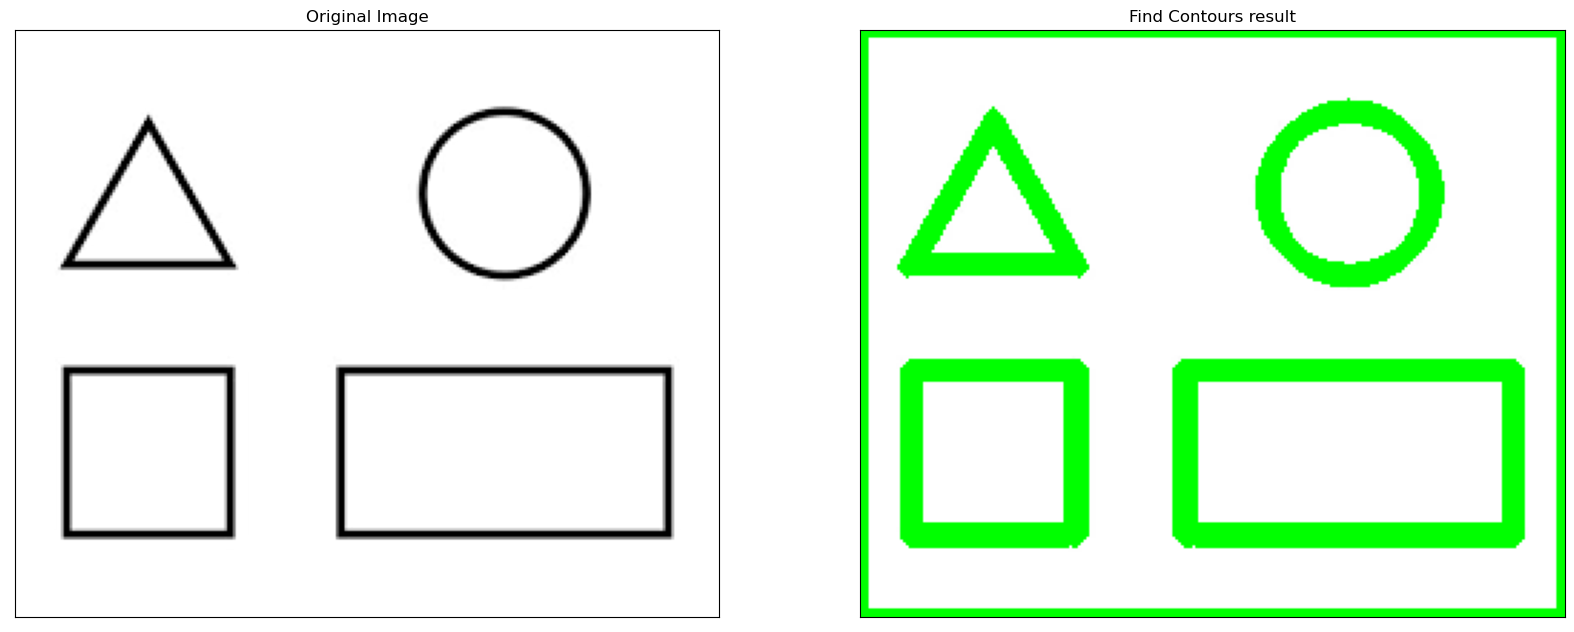

In [28]:
# https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
# https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
# https://pythonexamples.org/python-opencv-cv2-find-contours-in-image/


# Find contours
ret, thresh = cv2.threshold(original_img, 127, 255, 0)
# thresh = cv2.bitwise_not(thresh) # invert the image to make background black and foreground white (to remove the frame of the image)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# edged = cv2.Canny(original_img, 30, 200)
# contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))

# Draw contours
image_with_contours = original_img.copy()
image_with_contours = cv2.cvtColor(image_with_contours, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0,255,0), 3)
cv2.imshow('Contours', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(20,20))
# show the image with contours
plt.imshow(image_with_contours, cmap='gray')
plt.title('Image with contours')

plt.subplot(121),plt.imshow(original_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_with_contours)
plt.title('Find Contours result'), plt.xticks([]), plt.yticks([])

plt.show()



<div dir="rtl"> 
ج) با استفاده از تابع  approxPolyDPنقاط گوشه شکل را پیدا کنید و علامت بزنید. سپس تشخیص دهید که شکل
متعلق به چه کلاسی است و با متنی این را در تصویر مشخص کنید.
مراحل انجام کار را در گزارش با آوردن تصاویر هر مرحله، توضیح دهید
</div>

src: https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html

cv.approxPolyDP(	curve, epsilon, closed[, approxCurve]	) ->	approxCurve

Approximates a polygonal curve(s) with the specified precision.

The function cv::approxPolyDP approximates a curve or a polygon with another curve/polygon with less vertices so that the distance between them is less or equal to the specified precision. It uses the Douglas-Peucker algorithm http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm

Parameters
curve:	Input vector of a 2D point stored in std::vector or Mat
approxCurve:	Result of the approximation. The type should match the type of the input curve.
epsilon:	Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
closed:	If true, the approximated curve is closed (its first and last vertices are connected). Otherwise, it is not closed.

<ul>
<li>The process of approximating the shape of a contour of a given polygon to the shape of the original polygon to the specified precision is called approximation of a shape of the contour.</li>
<li>We make use of a function in OpenCV called approxPolyDP() function to perform an approximation of a shape of a contour.</li>
<li>The image of a polygon whose shape of a contour must be approximated is read using the imread() function.</li>
<li>Then the input image is converted into a grayscale image.</li>
<li>Then thresholding function is applied on the grayscale image to convert it into a binary image.</li>
<li>Then the contours present in the image are determined using findContours() function.</li>
<li>Then for each of the contours determined in the image, the approxPolyDP() function is applied to determine the shape of the polygons present in the image.</li>
<li>Then the determined shape of the contours is drawn on the image using drawContours() function and then displayed as the output of the program.</li>
</ul>

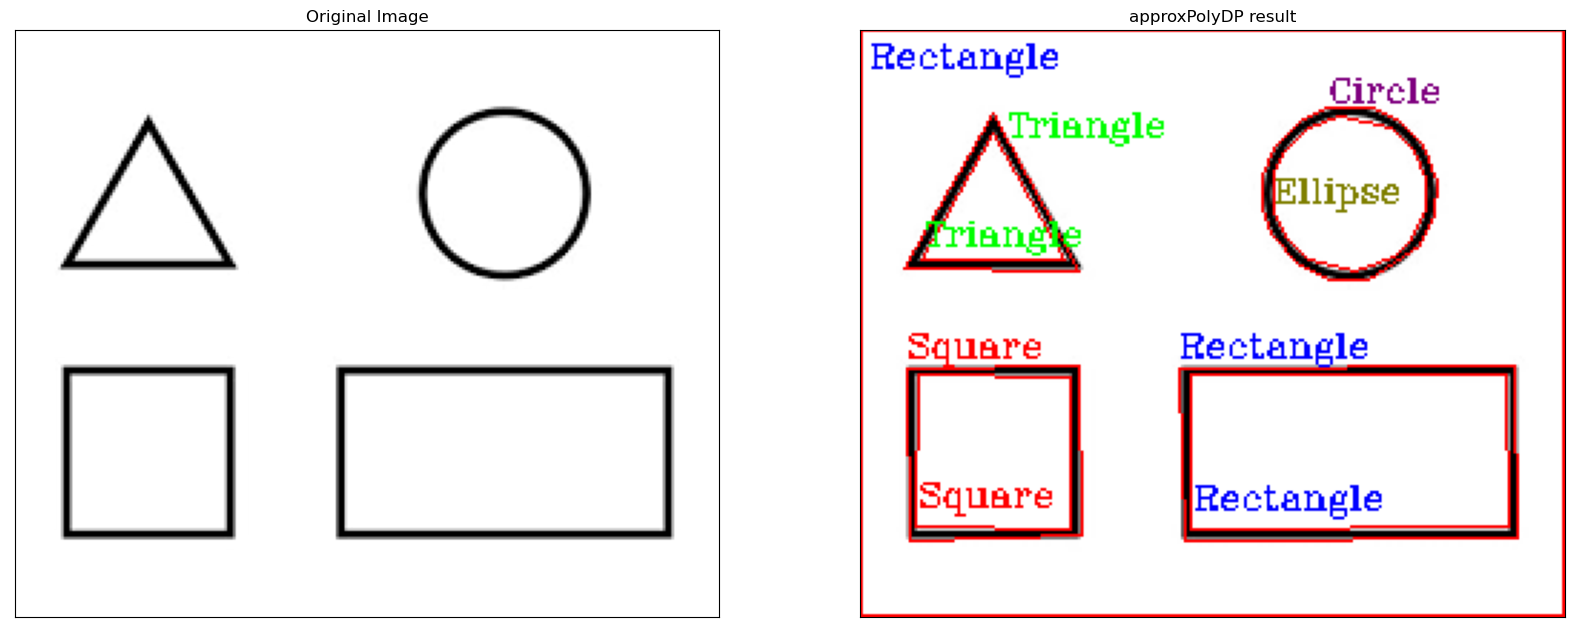

In [29]:
# https://www.educba.com/opencv-approxpolydp/
# https://pyimagesearch.com/2021/10/06/opencv-contour-approximation/
# https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/

image_with_shapes = original_img.copy()
# changing the image to color image
image_with_shapes = cv2.cvtColor(image_with_shapes, cv2.COLOR_GRAY2BGR)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    epsilon = 0.0102 * perimeter
    # Calculates a contour perimeter(محیط) or a curve length.
    # The function computes a curve length or a closed contour perimeter.
    # Parameters
    # curve:	Input vector of 2D points, stored in std::vector or Mat.
    # closed:	Flag indicating whether the curve is closed or not.
    # Examples:
    # samples/cpp/squares.cpp, and samples/tapi/squares.cpp.
    approximations = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(image_with_shapes, [approximations], 0, (255, 0, 0), 1)
    # cv2.drawContours(image_with_shapes, [approximations], -1, (0, 255, 0), 1)
    # the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    if len(approximations) == 3: 
        if perimeter > 159:
            cv2.putText(image_with_shapes, "Triangle", (i+5, j+8), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
        else:
            cv2.putText(image_with_shapes, "Triangle", (approximations[1][0][0]+1, approximations[1][0][1]-5), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 255, 0), 1)
    elif len(approximations) == 4:
        x, y, width, height = cv2.boundingRect(approximations)
        aspect_ratio = float(width)/height
        if aspect_ratio >= 0.95 and aspect_ratio <= 1.05: 
            if perimeter > 215:
                cv2.putText(image_with_shapes, "Square", (i, j-4), cv2.FONT_HERSHEY_COMPLEX, 0.4, (255, 0, 0), 1)
            else:
                cv2.putText(image_with_shapes, "Square", (approximations[1][0][0]+1, approximations[1][0][1]-7), cv2.FONT_HERSHEY_COMPLEX, 0.4, (255, 0, 0), 1)
                
        else: 
            if perimeter > 329:
                if perimeter > 500:
                    cv2.putText(image_with_shapes, "Rectangle", (i+3, j+13), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 255), 1)
                else:
                    cv2.putText(image_with_shapes, "Rectangle", (i, j-4), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 255), 1)
            else:
                cv2.putText(image_with_shapes, "Rectangle", (approximations[1][0][0]+1, approximations[1][0][1]-7), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 0, 255), 1)
    elif len(approximations) == 5:
        cv2.putText(image_with_shapes, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 0.4, (0, 127, 127), 1)
    elif 6 < len(approximations) < 15: # 6 < len(approximations) < 14 --> Ellipse change to circle
        cv2.putText(image_with_shapes, "Ellipse", (i-23, j+30), cv2.FONT_HERSHEY_COMPLEX, 0.4, (127, 127, 0),1)
    else:
        cv2.putText(image_with_shapes, "Circle", (i, j-2), cv2.FONT_HERSHEY_COMPLEX, 0.4, (127, 0, 127), 1)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(original_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_with_shapes)
plt.title('approxPolyDP result'), plt.xticks([]), plt.yticks([])
plt.show()

#displaying the resulting image as the output on the screen
# cv2.imshow("Resulting_image", image_with_shapes)
# cv2.waitKey(0)

د) امتیازی: اگر میخواستیم با روش مهندسی ویژگی یک دستهبند برای تشخیص اشکال بسازیم، به نظر شما چه
ویژگیهای مفید بود و با دانش فعلی خود چند تا از آنها را میتوانستید پیادهسازی کنید؟

<div dir="rtl">
    برای ساخت یک دسته بند برای تشخیص اشکال، ویژگیهای مفید عبارتند از:
1. تعداد گوشه‌ها: تعداد گوشه‌ها می‌تواند به عنوان یک ویژگی مفید برای تشخیص اشکال استفاده شود. به طور مثال، مثلث سه گوشه دارد، مستطیل و مربع چهار گوشه دارند.
2. نسبت طول به عرض: نسبت طول به عرض نیز می‌تواند به عنوان ویژگی استفاده شود. برای مثال، در صورتی که نسبت طول به عرض برابر با ۱ باشد، شکل یک مربع است.
3. نسبت پیرامون به مساحت: نسبت پیرامون به مساحت همچنین می‌تواند به عنوان ویژگی استفاده شود. این ویژگی برای تمام اشکال قابل استفاده است.
4. و به طور کلی می توان ویژگی(feature) های مختلفی مانند تعداد ضلع ها و قطر ها ، اندازه ضلع ها و قطر ها ، مساحت، محیط، نسبت اضلاع و ... تعریف کنیم و از الگوریتم های یادگیری ماشین کلاسیک (machine learning) برای آموزش classifier استفاده کنیم.

برای پیاده‌سازی این ويژگي ها، می‌توان از تابع‌هایی مانند cv2.findContours و cv2.approxPolyDP استفاده کرد. به طور مثال، برای تعداد گوشه‌ها، می‌توان از تابع cv2.approxPolyDP استفاده کرد و تعداد نقاط گوشه را شمارش کرد. برای نسبت طول به عرض و نسبت پیرامون به مساحت، می‌توان از تابع cv2.boundingRect و cv2.arcLength استفاده کرد و سپس این ویژگی‌ها را با استفاده از الگوریتم دسته‌بندی مناسب (مانند SVM) در دسته‌بند قرار داد.

</div>